In [34]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

Part 1: Categorical Naive Bayes on Iris Dataset

Ques:
1. Use Categorical Naive Bayes classifier with GridCV search to classify the Iris toy dataset or drybeans dataset from UCI repository. Use appropriate pre-processing. Present the performance metrics Accuracy and Confusion matrix for training and testing sets.


Categorical Naive Bayes is usually used for categorical discrete features that can be seperated in different categories
Here, used for Iris dataset

In [35]:
#Load and prepare Iris dataset
iris = load_iris()
X = iris.data   #Independent variable/feature
y = iris.target #Dependent vraiable/feature

In [36]:
#Preprocessing
#Since the iris dataset is made of continuous features, we use binnng for preprocessing
#this discretizes the data for Categorical NB
#pd.qcut -> bins the data into quantiles.
# q=5 -> the data is split into five equal-frequency bins for each feature.
#labels=False -> assigns integer labels (from 0 to 4) to each bin, resulting in categorical encoding for each feature.

X_binned = np.zeros_like(X)
for i in range(X.shape[1]):
    X_binned[:, i] = pd.qcut(X[:, i], q=5, labels=False)

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size=0.2, random_state=42)

#Pparameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'min_categories': [2, 3, 4, 5]
}

In [38]:
#Train CategoricalNB with GridSearchCV
cnb = CategoricalNB()
grid_search = GridSearchCV(cnb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'min_categories': [2, 3, 4, 5]})

In [39]:
# Get best model and make predictions
best_cnb = grid_search.best_estimator_
#Training on best cnb
y_train_pred = best_cnb.predict(X_train)
y_test_pred = best_cnb.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

#Confusion matrix
print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix (Testing):")
print(confusion_matrix(y_test, y_test_pred))
print("\n\n")

Best parameters: {'alpha': 0.1, 'min_categories': 2}

Training Accuracy: 0.9416666666666667
Testing Accuracy: 0.9666666666666667

Confusion Matrix (Training):
[[40  0  0]
 [ 0 37  4]
 [ 0  3 36]]

Confusion Matrix (Testing):
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]





----------------------------------------










.
**Part 2: Multinomial Naive Bayes on 20 Newsgroups Dataset**

Ques:
2. Use 20newsgroup toy dataset from sklearn or download a text classification task oriented dataset from Kaggle or UCI repository to implement Multinomial Naive Bayes classifier and present the performance metrics. 


In multinomial NB, eature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. 
Dataset: The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics

In [40]:
#Loading 20 newsgroups dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

In [41]:
#Preprocessing
#For preprocessing, TF-IDF helps convert text into numbers for MNB (based on frequency)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(newsgroups.data)
y = newsgroups.target
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Train Multinomial Naive Bayes
mnb = MultinomialNB(alpha=0.1)  # Using small alpha for smoothing
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [10]:
# Make predictions
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix (Testing):")
print(confusion_matrix(y_test, y_test_pred))


Training Accuracy: 0.9354005167958657
Testing Accuracy: 0.8053097345132744

Confusion Matrix (Training):
[[596   7  22  19]
 [  5 747  26   0]
 [ 11  19 752   4]
 [ 30   5  27 439]]

Confusion Matrix (Testing):
[[113   2  11  29]
 [  3 179  12   1]
 [  9  13 174   5]
 [ 29   5  13  80]]


--------------------------------------------

**Part 3: Bernoulli Naive Bayes on Binary Features**

Ques:
3.  Use any dataset of your choice to implement the Binomial Naive Bayes Classifier. Present the performance metrics.

(Binary classification)

In [43]:
#Random binary dataset
np.random.seed(42)
n_samples = 1000
n_features = 10

# Generate binary features
X = np.random.randint(2, size=(n_samples, n_features))
# Generate binary target (simple rule: if sum of first 3 features > 1, class = 1)
y = (X[:, :3].sum(axis=1) > 1).astype(int)

In [44]:
#Splitting and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bernoulli Naive Bayes
bnb = BernoulliNB(alpha=1.0)  # Using Laplace smoothing
bnb.fit(X_train, y_train)

BernoulliNB()

In [45]:
y_train_pred = bnb.predict(X_train)
y_test_pred = bnb.predict(X_test)

Training Accuracy: 1.0
Testing Accuracy: 1.0

Confusion Matrix (Training):
[[408   0]
 [  0 392]]

Confusion Matrix (Testing):
[[102   0]
 [  0  98]]


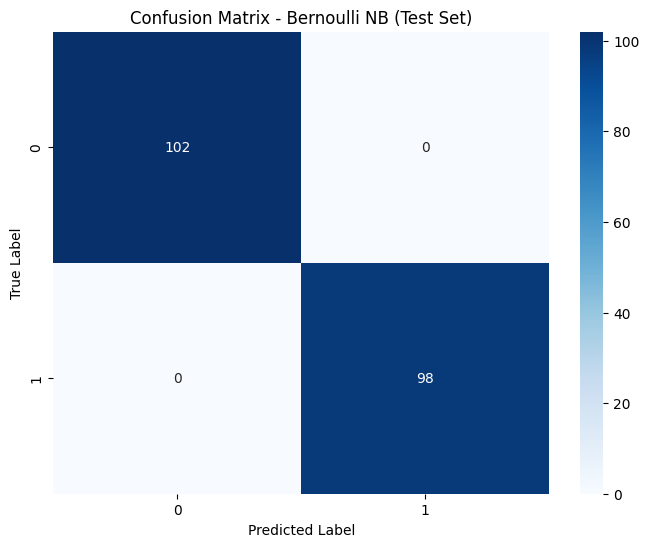

In [46]:
#Printing results and plotting
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nConfusion Matrix (Training):")
print(confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix (Testing):")
print(confusion_matrix(y_test, y_test_pred))

# Visualization function for confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred), 'Confusion Matrix - Bernoulli NB (Test Set)')